In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import cv2
from glob import glob

# h&m homepage
- 홈페이지상 크게 6개의 분류
- women, divided, men, baby, kids, h&m home
- kids의 경우 boys, girls 각 2-8y, 9-14y
- divided는 혼성(?)

In [106]:
df_a = pd.read_csv('./articles.csv')
df_c = pd.read_csv('./customers.csv')
df_t = pd.read_csv('./transactions_train.csv')

# article
## columns desc
- article_id : 상품id
- product_code : product_code
- prod_name : 상품명, 상품명에 (1),(2) 등  확인 필요
- product_type_no : 상품 타입 no, -1 인 경우 unknown -> unknown에 대한 전처리 필요? (121개)
- product_type_name : 상품타입name, product_type_no와 일치 
- product_group_name : 상품 group name, 상품 타입no 같을 시 일치 
- graphical_appearance_no : graphical_appearance_no, -1 인 경우 존재 -> graphical appearance_name = unknown(52개) -> 이미지를 통해 확인필요
- colour_group_code : 색상 코드, -1일시 unknown
- colour_group_name : 색상 코드에 따른 색상
- perceived_colour_value_id : perceived_colour_value id, nunique = 8, -1 => unknown
- perceived_colour_value_name : perceived_colour_value_name
- perceived_colour_master_id : 세분화된 색상(?) code
- perceived_colour_master_name : 세분화된 색상에 대한 name? -> 이미지 확인 필요
- department_no : department.no
- department_name : index_name에 대한 세부 분류(?)
- index_no : index no.
- index_name : 상품 항목에 대한 중분류(?) -> ladies wear,menswear, lingeries/tights, divided, sports 등 nunique = 10
- index_group_no : 
- index_group_name : 상품항목에 대한 대분류(?) -> ladieswear, menswear, baby./chidren, sports, divided 등
- section_no :
- section_name :
- garment_no : 
- garment_name :
- detail_desc : 상품 상세 설명

## 제품별로 여성,남성용 파악 -> transaction train에서 customer_id가 구매한 물품으로 user의 성별 부여

In [94]:
# reference : https://github.com/Wp-Zhang/H-M-Fashion-RecSys/blob/main/src/data/datahelper.py

In [3]:
df_a['index_group_name'].unique()

array(['Ladieswear', 'Baby/Children', 'Menswear', 'Sport', 'Divided'],
      dtype=object)

In [4]:
df_a['index_name'].unique()

array(['Ladieswear', 'Lingeries/Tights', 'Baby Sizes 50-98', 'Menswear',
       'Ladies Accessories', 'Sport', 'Children Sizes 92-140', 'Divided',
       'Children Sizes 134-170', 'Children Accessories, Swimwear'],
      dtype=object)

In [5]:
df_a['product_type_name'].unique().tolist()

['Vest top',
 'Bra',
 'Underwear Tights',
 'Socks',
 'Leggings/Tights',
 'Sweater',
 'Top',
 'Trousers',
 'Hair clip',
 'Umbrella',
 'Pyjama jumpsuit/playsuit',
 'Bodysuit',
 'Hair string',
 'Unknown',
 'Hoodie',
 'Sleep Bag',
 'Hair/alice band',
 'Belt',
 'Boots',
 'Bikini top',
 'Swimwear bottom',
 'Underwear bottom',
 'Swimsuit',
 'Skirt',
 'T-shirt',
 'Dress',
 'Hat/beanie',
 'Kids Underwear top',
 'Shorts',
 'Shirt',
 'Cap/peaked',
 'Pyjama set',
 'Sneakers',
 'Sunglasses',
 'Cardigan',
 'Gloves',
 'Earring',
 'Bag',
 'Blazer',
 'Other shoe',
 'Jumpsuit/Playsuit',
 'Sandals',
 'Jacket',
 'Costumes',
 'Robe',
 'Scarf',
 'Coat',
 'Other accessories',
 'Polo shirt',
 'Slippers',
 'Night gown',
 'Alice band',
 'Straw hat',
 'Hat/brim',
 'Tailored Waistcoat',
 'Necklace',
 'Ballerinas',
 'Tie',
 'Pyjama bottom',
 'Felt hat',
 'Bracelet',
 'Blouse',
 'Outdoor overall',
 'Watch',
 'Underwear body',
 'Beanie',
 'Giftbox',
 'Sleeping sack',
 'Dungarees',
 'Outdoor trousers',
 'Wallet',
 'S

In [9]:
female_product_types = [
                "Bra",
                "Underwear Tights",
                "Leggings/Tights",
                "Hair clip",
                "Hair string",
                "Hair/alice band",
                "Bikini top",
                "Skirt",
                "Dress",
                "Earring",
                "Alice band",
                "Straw hat",
                "Necklace",
                "Ballerinas",
                "Blouse",
                "Beanie",
                "Giftbox",
                "Pumps",
                "Bootie",
                "Heeled sandals",
                "Nipple covers",
                "Hair ties",
                "Underwear corset",
                "Bra extender",
                "Underdress",
                "Underwear set",
                "Sarong",
                "Leg warmers",
                "Hairband",
                "Tote bag",
                "Earrings",
                "Flat shoes",
                "Heels",
                "Cap",
                "Shoulder bag",
                "Headband",
                "Baby Bib",
                "Cross-body bag",
                "Bumbag",
            ]

In [10]:
set(df_a['product_type_name'].unique().tolist())-set(female_product_types)

{'Accessories set',
 'Backpack',
 'Bag',
 'Belt',
 'Blanket',
 'Blazer',
 'Bodysuit',
 'Boots',
 'Bracelet',
 'Braces',
 'Bucket hat',
 'Cap/peaked',
 'Cardigan',
 'Chem. cosmetics',
 'Clothing mist',
 'Coat',
 'Costumes',
 'Cushion',
 'Dog Wear',
 'Dog wear',
 'Dungarees',
 'Eyeglasses',
 'Felt hat',
 'Fine cosmetics',
 'Flat shoe',
 'Flip flop',
 'Garment Set',
 'Gloves',
 'Hat/beanie',
 'Hat/brim',
 'Hoodie',
 'Jacket',
 'Jumpsuit/Playsuit',
 'Keychain',
 'Kids Underwear top',
 'Long John',
 'Marker pen',
 'Mobile case',
 'Moccasins',
 'Night gown',
 'Other accessories',
 'Other shoe',
 'Outdoor Waistcoat',
 'Outdoor overall',
 'Outdoor trousers',
 'Polo shirt',
 'Pre-walkers',
 'Pyjama bottom',
 'Pyjama jumpsuit/playsuit',
 'Pyjama set',
 'Ring',
 'Robe',
 'Sandals',
 'Scarf',
 'Sewing kit',
 'Shirt',
 'Shorts',
 'Side table',
 'Sleep Bag',
 'Sleeping sack',
 'Slippers',
 'Sneakers',
 'Socks',
 'Soft Toys',
 'Stain remover spray',
 'Sunglasses',
 'Sweater',
 'Swimsuit',
 'Swimwear 

In [25]:
df_a[df_a['product_type_name']=='Bracelet'].article_id.unique()

array([392820002, 396690001, 396690010, 396690014, 396690020, 407806001,
       407806002, 408884001, 408884002, 408884003, 408884004, 416089002,
       491992003, 532224001, 532224002, 532227001, 532227002, 544895001,
       544895002, 544895003, 561746001, 577733001, 594803001, 599231002,
       608005001, 608005002, 608005003, 611491002, 612079002, 613925001,
       624298001, 625147002, 633668001, 641004001, 647111001, 648072001,
       650456001, 650536001, 650536002, 654222001, 654225001, 659105001,
       660150001, 660215001, 661442001, 661442002, 662530001, 662531001,
       662533001, 663185001, 663185002, 664140001, 671778001, 672228001,
       672228002, 673158002, 675255001, 676735001, 677511001, 677511002,
       678118001, 682051001, 682052001, 682054001, 682056001, 684380001,
       685065001, 693211001, 696792001, 702057001, 702064001, 703625001,
       717504001, 723948001, 725379001, 725379002, 728239001, 732376001,
       732376002, 735910001, 736185002, 738701001, 

In [15]:
img_files = glob('./images/*/*.jpg')

In [27]:
df_a.article_id.nunique(), len(img_files)

(105542, 105100)

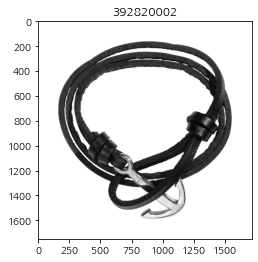

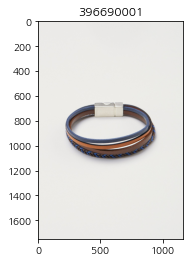

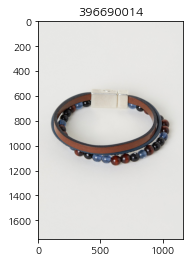

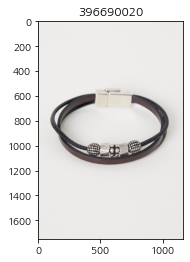

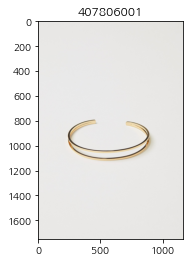

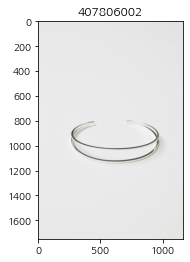

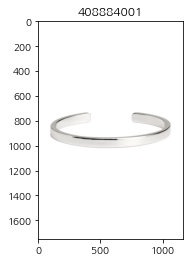

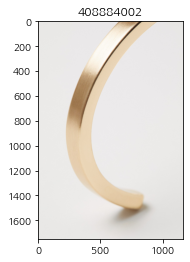

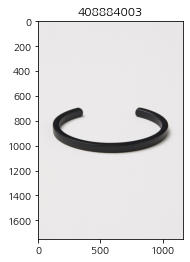

In [28]:
#BRACELET의 경우 남성용도 있어 보였다!
for item in df_a[df_a['product_type_name']=='Bracelet'].article_id.unique()[:10]:
    try:
        file = [x for x in img_files if str(item) in x][0]
        plt.figure()
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.title(item)
        plt.imshow(img)
    except:
        pass

In [36]:
df_a['department_name'].unique()

array(['Jersey Basic', 'Clean Lingerie', 'Tights basic', 'Baby basics',
       'Casual Lingerie', 'Jersey', 'EQ & Special Collections',
       'Hair Accessories', 'Other items', 'Baby Nightwear',
       'Men Sport Woven', 'Men Sport Bottoms', 'Kids Boy Denim',
       'Shopbasket Socks', 'Socks', 'UW', 'Young Girl Jersey Basic',
       'Jacket Street', 'Belts', 'Divided Shoes', 'Swimwear',
       'Underwear Jersey', 'Basic 1', 'Tops Knitwear DS', 'Men Sport Acc',
       'Kids Boy Jersey Basic', 'Young Girl UW/NW', 'Shirt', 'Nightwear',
       'Trouser', 'Small Accessories', 'Sunglasses', 'Gloves/Hats',
       'Knit & Woven', 'Basics', 'Accessories', 'Jewellery',
       'Jersey Fancy DS', 'Trousers DS', 'Bags', 'Blazer S&T', 'Knitwear',
       'Woven bottoms', 'Shorts', 'Dresses DS', 'Expressive Lingerie',
       'Kids Girl UW/NW', 'Young Boy Jersey Basic', 'Kids Girl S&T',
       'Young Girl S&T', 'Shoes / Boots inactive from s5', 'Nursing',
       'Jersey Fancy', 'Shoes', 'Functional L

In [97]:
# article_id => item의 여성용, 남성용, 혼성용 구분
# 혼성 : 0 , 남성 : 1, 여성 : 2 
def item_gender(x):
    x['item_gender'] = 0    
    if x['index_group_name'] == 'Menswear':
        x['item_gender'] = 1
    elif x['index_group_name'] == 'Ladieswear':
        x['item_gender'] = 2
    else:
        if ('boy' in x['department_name'].lower() or 'men' in x['department_name'].lower()):
            x['item_gender'] = 1
        elif ('girl' in x['department_name'].lower() or 'ladies' in x['department_name'].lower()
             or x['product_type_name'] in female_product_types):
            x['item_gender'] = 2
    return x   
    

In [107]:
item = df_a.copy()

In [108]:
tqdm.pandas()
item = item.progress_apply(item_gender, axis=1)

100%|████████████████████████████████████████████████████████████████████████| 105542/105542 [00:55<00:00, 1897.95it/s]


In [34]:
pd.set_option('display.max_columns', None)

In [109]:
item.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,item_gender
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,2
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,2
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,2
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",2
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",2


In [110]:
import gc
gc.collect()

66

In [111]:
item.item_gender.value_counts()

2    64524
1    25801
0    15217
Name: item_gender, dtype: int64

In [112]:
trans = df_t.copy()
trans = pd.merge(trans, item[['article_id', 'item_gender', 'product_type_name']], on='article_id', how='left')

In [113]:
trans.head()

,t_dat,customer_id,article_id,price,sales_channel_id,item_gender,product_type_name
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,2,Underwear body
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,2,Bra
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,0,Sweater
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,2,Sweater
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,2,Sweater


In [114]:
t_cnt = trans.groupby(['customer_id']).size().reset_index(name='t_cnt')

In [115]:
t_cnt

,customer_id,t_cnt
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,21
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,86
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,18
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,2
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,13
...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,51
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,84
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,45
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,7


In [116]:
gender_sales = trans.groupby(["customer_id", "item_gender"]).size().reset_index(name="cnt")

In [117]:
gender_sales

,customer_id,item_gender,cnt
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,1
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,1,4
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2,16
3,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0,17
4,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,1,1
...,...,...,...
2554554,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1,5
2554555,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,2,26
2554556,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0,2
2554557,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,2,5


In [118]:
gender_sales = gender_sales.merge(t_cnt, on=["customer_id"], how="left")

In [119]:
gender_sales["ratio"] = gender_sales["cnt"] / gender_sales["t_cnt"]

In [120]:
gender_sales

,customer_id,item_gender,cnt,t_cnt,ratio
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,1,21,0.047619
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,1,4,21,0.190476
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2,16,21,0.761905
3,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0,17,86,0.197674
4,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,1,1,86,0.011628
...,...,...,...,...,...
2554554,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1,5,45,0.111111
2554555,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,2,26,45,0.577778
2554556,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0,2,7,0.285714
2554557,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,2,5,7,0.714286


In [121]:
gender_sales = pd.pivot_table(
            gender_sales, values="ratio", index="customer_id", columns=["item_gender"]
        )

In [127]:
gender_sales = gender_sales.reset_index()
gender_sales.rename(columns = {
    0:'divided',
    1:'male',
    2:'female'
}, inplace=True)

In [133]:
gender_sales[gender_sales['female'] ==1].customer_id.iloc[1]

'00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a'

In [134]:
df_t[df_t['customer_id']=='00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a']

,t_dat,customer_id,article_id,price,sales_channel_id
1042393,2018-10-12,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,634249005,0.027102,1
1042394,2018-10-12,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,677049001,0.040661,1
7059732,2019-03-07,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,698286003,0.025407,2
7059733,2019-03-07,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,707704003,0.016932,2
17345072,2019-10-01,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,399061015,0.044475,2
17705977,2019-10-09,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,399061015,0.059305,2
26724604,2020-06-03,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,589440005,0.050831,2
26724605,2020-06-03,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,827971001,0.033881,2
26724606,2020-06-03,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,818320001,0.042356,2
30223079,2020-08-12,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,896152002,0.027102,2


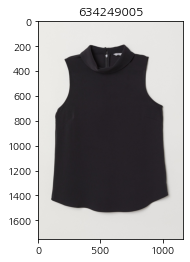

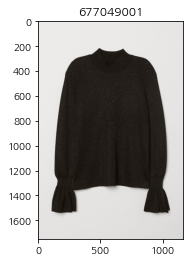

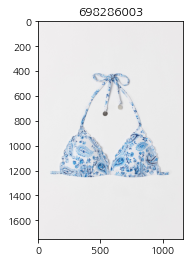

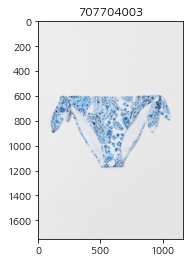

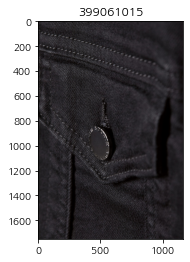

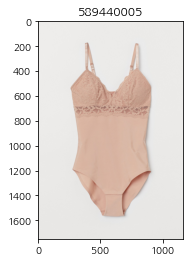

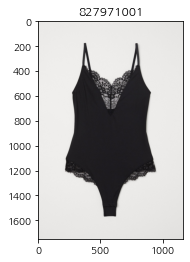

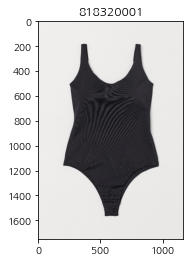

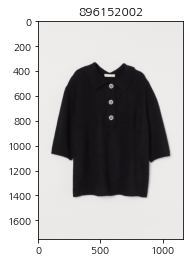

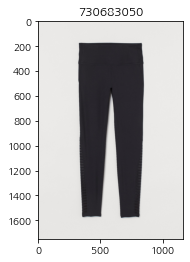

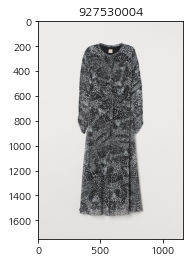

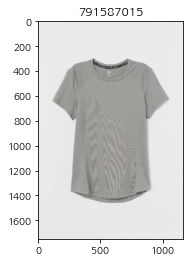

In [135]:
for item in df_t[df_t['customer_id']=='00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a'].article_id.unique():
    try:
        file = [x for x in img_files if str(item) in x][0]
        plt.figure()
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.title(item)
        plt.imshow(img)
    except:
        pass

In [137]:
gender_sales.fillna(0, inplace=True)

In [138]:
gender_sales

item_gender,index,customer_id,divided,male,female
0,0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.047619,0.190476,0.761905
1,1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.197674,0.011628,0.790698
2,2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.000000,0.222222,0.777778
3,3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.000000,0.000000,1.000000
4,4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.000000,0.000000,1.000000
...,...,...,...,...,...
1362276,1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.000000,0.019608,0.980392
1362277,1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.392857,0.035714,0.571429
1362278,1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0.311111,0.111111,0.577778
1362279,1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0.285714,0.000000,0.714286


In [139]:
#argmax로 customer의 gender를 파악하는 것이 맞을지 모르겠지만 우선 argmax로 추측하여보았습니다.
gender_sales['user_gender'] = np.argmax(gender_sales[['divided', 'male', 'female']].values, axis=1)

In [140]:
gender_sales

item_gender,index,customer_id,divided,male,female,user_gender
0,0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.047619,0.190476,0.761905,2
1,1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.197674,0.011628,0.790698,2
2,2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.000000,0.222222,0.777778,2
3,3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.000000,0.000000,1.000000,2
4,4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.000000,0.000000,1.000000,2
...,...,...,...,...,...,...
1362276,1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.000000,0.019608,0.980392,2
1362277,1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.392857,0.035714,0.571429,2
1362278,1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0.311111,0.111111,0.577778,2
1362279,1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0.285714,0.000000,0.714286,2


In [143]:
gender_sales[gender_sales['user_gender']==1].head()

item_gender,index,customer_id,divided,male,female,user_gender
9,9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,0.000000,0.500000,0.500000,1
11,11,000097d91384a0c14893c09ed047a963c4fc6a5c021044...,0.266667,0.400000,0.333333,1
20,20,0000e9a4db2da4e9c68558ad1e7df570d02767b213ec6b...,0.000000,0.714286,0.285714,1
28,28,0001420326c217a367048472e05395373c40a039f6fd45...,0.000000,0.666667,0.333333,1
39,39,0001e7a9c3a9749ef86fd992a8a9cb487ba609b8763c7c...,0.000000,1.000000,0.000000,1


In [142]:
gender_sales[gender_sales['user_gender']==1].customer_id.iloc[2]

'0000e9a4db2da4e9c68558ad1e7df570d02767b213ec6bcb10283ab05ee53015'

In [145]:
gender_sales[gender_sales['user_gender']==1].customer_id.iloc[3]

'0001420326c217a367048472e05395373c40a039f6fd45cd9e4b3a818d02886a'

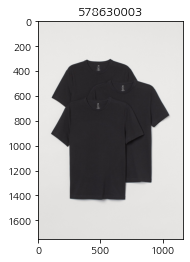

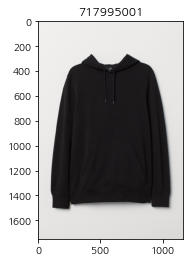

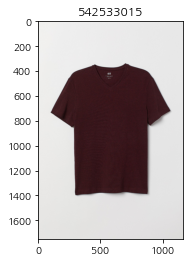

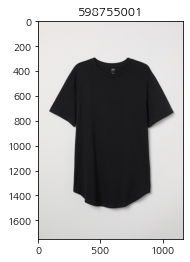

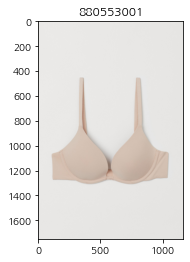

In [144]:
for item in df_t[df_t['customer_id']=='0000e9a4db2da4e9c68558ad1e7df570d02767b213ec6bcb10283ab05ee53015'].article_id.unique():
    try:
        file = [x for x in img_files if str(item) in x][0]
        plt.figure()
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.title(item)
        plt.imshow(img)
    except:
        pass

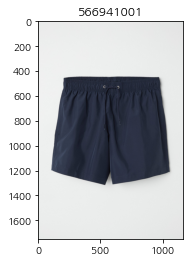

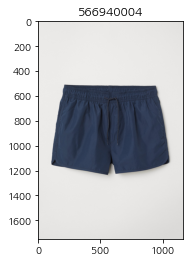

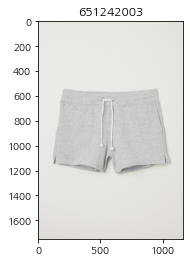

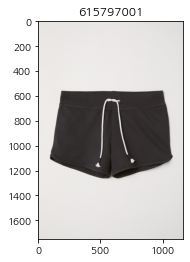

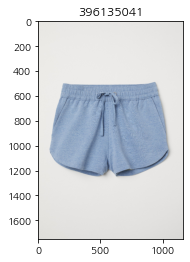

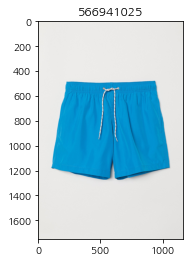

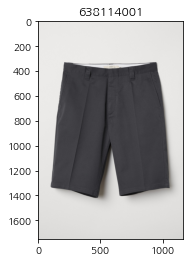

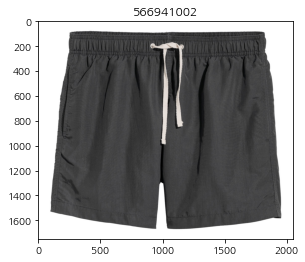

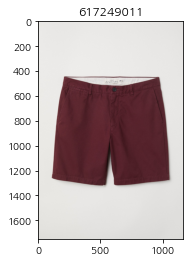

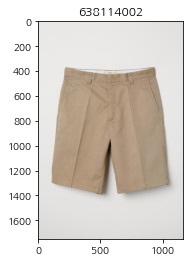

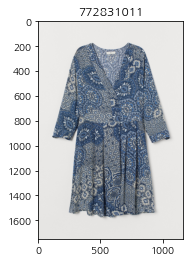

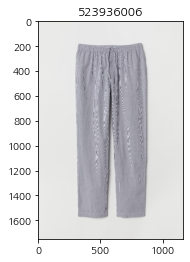

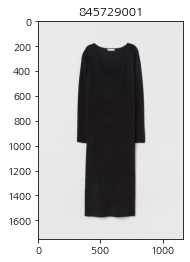

In [146]:
for item in df_t[df_t['customer_id']=='0001420326c217a367048472e05395373c40a039f6fd45cd9e4b3a818d02886a'].article_id.unique():
    try:
        file = [x for x in img_files if str(item) in x][0]
        plt.figure()
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.title(item)
        plt.imshow(img)
    except:
        pass

# 할인율(?)

In [152]:
#discussion에 나왔던 590을 곱해줘서 eda 해보기 위함
# customer가 할인율이 높은 제품을 많이 구매했는지 확인 가능(?)
df_t['new_price'] = df_t['price'] * 590

In [153]:
df_t

,t_dat,customer_id,article_id,price,sales_channel_id,new_price
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,29.99
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,17.99
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,8.99
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,9.99
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,9.99
...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,34.99
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,24.99
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,25.49
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,3.99


In [154]:
df_t.groupby('article_id')['new_price'].max()

article_id
108775015     5.40
108775044     5.02
108775051     4.99
110065001    14.99
110065002    14.99
             ...  
952267001     9.99
952938001    29.99
953450001     9.99
953763001    12.99
956217002    34.99
Name: new_price, Length: 104547, dtype: float64

In [155]:
#article id 당 가장 비싼 price가 정가이지 않을까, 
#정가보다 저렴하게 구매한 제품은 각종 sale기간 및 학생할인 등의 promotion으로 볼 수도 있을 것
list_price_dict = dict(zip(df_t.groupby('article_id')['new_price'].max().index, 
                           df_t.groupby('article_id')['new_price'].max().values))

In [156]:
list_price_dict

{108775015: 5.3999999999999675,
 108775044: 5.019999999999949,
 108775051: 4.98999999999996,
 110065001: 14.98999999999997,
 110065002: 14.98999999999997,
 110065011: 14.98999999999997,
 111565001: 4.98999999999996,
 111565003: 4.98999999999996,
 111586001: 10.019999999999984,
 111593001: 9.989999999999995,
 111609001: 7.989999999999981,
 112679048: 7.989999999999981,
 112679052: 5.9899999999999665,
 114428026: 9.989999999999995,
 114428030: 7.989999999999981,
 116379047: 9.989999999999995,
 118458003: 19.98999999999995,
 118458004: 19.98999999999995,
 118458028: 19.98999999999995,
 118458029: 19.98999999999995,
 118458034: 9.989999999999995,
 118458038: 19.98999999999995,
 118458039: 19.98999999999995,
 120129001: 10.219999999999951,
 120129014: 9.989999999999995,
 120129018: 9.989999999999995,
 120129025: 9.989999999999995,
 123173001: 9.989999999999995,
 126589006: 2.9899999999999456,
 126589007: 2.9899999999999456,
 126589010: 2.9899999999999456,
 126589011: 0.989999999999991,
 126

In [157]:
df_t['list_price'] = df_t.article_id.progress_apply(lambda x: list_price_dict[x])

100%|██████████████████████████████████████████████████████████████████| 31788324/31788324 [00:34<00:00, 915557.41it/s]


In [158]:
df_t['discount_rate'] = 1 - (df_t['new_price'] / df_t['list_price']) 

In [159]:
df_t

,t_dat,customer_id,article_id,price,sales_channel_id,new_price,list_price,discount_rate
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,29.99,29.99,0.000000
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,17.99,17.99,0.000000
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,8.99,9.00,0.001111
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,9.99,19.99,0.500250
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,9.99,19.99,0.500250
...,...,...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,34.99,34.99,0.000000
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,24.99,24.99,0.000000
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,25.49,29.99,0.150050
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,3.99,7.99,0.500626


In [160]:
#할인율이 높은 item 확인?

df_t.groupby('article_id')[['discount_rate']].mean().reset_index().sort_values('discount_rate', ascending=False)

,article_id,discount_rate
30619,629420007,0.904073
45422,683356006,0.903675
27650,620425003,0.886524
57574,717490001,0.881234
73365,772005009,0.865933
...,...,...
9833,536663008,0.000000
97438,875950007,0.000000
97439,875950009,0.000000
86273,824038004,0.000000


In [161]:
df_t.groupby('article_id')[['discount_rate']].mean().reset_index().sort_values('discount_rate', ascending=False)[:10].article_id.tolist()

[629420007,
 683356006,
 620425003,
 717490001,
 772005009,
 584631023,
 547937013,
 767834001,
 542402001,
 678086006]

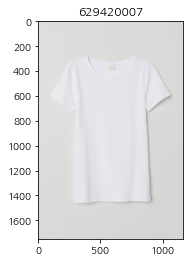

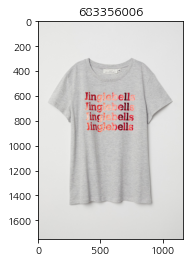

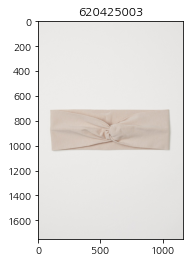

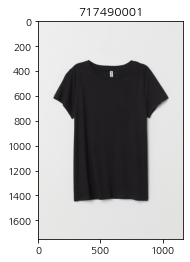

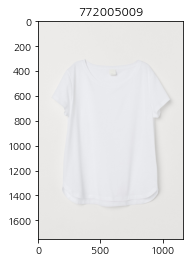

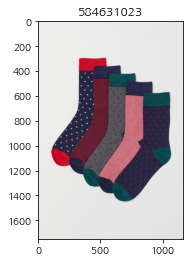

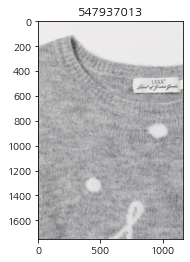

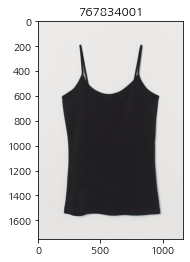

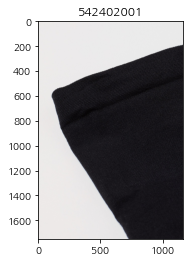

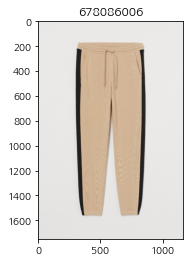

In [162]:
for item in df_t.groupby('article_id')[['discount_rate']].mean().reset_index().sort_values('discount_rate', ascending=False)[:10].article_id.tolist():
    try:
        file = [x for x in img_files if str(item) in x][0]
        plt.figure()
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.title(item)
        plt.imshow(img)
    except:
        pass

In [163]:
df_t.head()

,t_dat,customer_id,article_id,price,sales_channel_id,new_price,list_price,discount_rate
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,29.99,29.99,0.000000
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,17.99,17.99,0.000000
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,8.99,9.00,0.001111
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,9.99,19.99,0.500250
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,9.99,19.99,0.500250


In [164]:
discount_df = pd.merge(df_t.groupby('article_id')[['discount_rate']].mean().reset_index(), 
         df_t.groupby('article_id')[['discount_rate']].size().reset_index(),
         on='article_id',
         how='left').sort_values(0, ascending=False)

<AxesSubplot:xlabel='discount_rate', ylabel='0'>

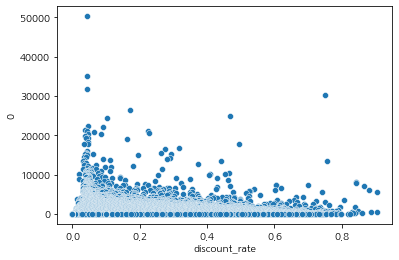

In [165]:
sns.scatterplot(data =discount_df, x='discount_rate', y=0)

In [149]:
df_t.groupby(['customer_id']).size().reset_index(name='t_cnt')

,customer_id,t_cnt
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,21
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,86
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,18
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,2
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,13
...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,51
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,84
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,45
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,7


In [167]:
discount_cnt = df_t.groupby(["customer_id", "discount_rate"]).size().reset_index(name="cnt")

In [176]:
discount_cnt.groupby('customer_id')[['cnt']].count().reset_index()

,customer_id,cnt
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,17
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,10
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,4
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,1
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,7
...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,3
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,39
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,29
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,3


In [177]:
discount_cnt2 = pd.merge(discount_cnt.groupby('customer_id')[['discount_rate']].mean().reset_index(), 
                         discount_cnt.groupby('customer_id')[['cnt']].count().reset_index(), 
                         on='customer_id',
                         how='left').rename(columns = {'cnt': 'total_cnt'})

In [191]:
discount_cnt.groupby('customer_id')[['discount_rate']].agg(['mean', 'min', 'max']).reset_index()

customer_id discount_rate       \
                                                                    mean  min   
0        00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...      0.293011  0.0   
1        0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...      0.254017  0.0   
2        000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...      0.163278  0.0   
3        00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...      0.000000  0.0   
4        00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...      0.178644  0.0   
...                                                    ...           ...  ...   
1362276  ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...      0.332247  0.0   
1362277  ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...      0.265907  0.0   
1362278  ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...      0.467263  0.0   
1362279  ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...      0.105591  0.0   
1362280  ffffd9ac14e89946416d80e791d064701994755c3ab686...      0.000000  0.0   

                   
              max  
0        0.625313  
1        0.628751  
2        0.280112  
3        0.000000  
4        0.250071  
...           ...  
1362276  0.896706  
1362277  0.750375  
1362278  0.885967  
1362279  0.166722  
1362280  0.000000  

[1362281 rows x 4 columns]

In [188]:
pd.merge(discount_cnt.groupby('customer_id')[['discount_rate']].agg(['mean', 'min', 'max']).reset_index(), 
                         discount_cnt.groupby('customer_id')[['cnt']].count().reset_index(), 
                         on='customer_id',
                         how='left').rename(columns = {'cnt': 'total_cnt'})

C:\Users\LEE\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,customer_id,"(customer_id, )","(discount_rate, mean)","(discount_rate, min)","(discount_rate, max)",total_cnt
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.293011,0.0,0.625313,17
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.254017,0.0,0.628751,10
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.163278,0.0,0.280112,4
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.000000,0.0,0.000000,1
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.178644,0.0,0.250071,7
...,...,...,...,...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.332247,0.0,0.896706,3
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.265907,0.0,0.750375,39
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0.467263,0.0,0.885967,29
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0.105591,0.0,0.166722,3


In [178]:
discount_cnt2

,customer_id,discount_rate,total_cnt
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.293011,17
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.254017,10
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.163278,4
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.000000,1
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.178644,7
...,...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.332247,3
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.265907,39
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0.467263,29
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0.105591,3


C:\Users\LEE\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_cnt', ylabel='Density'>

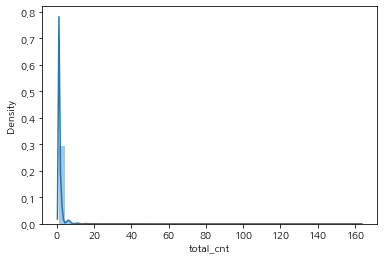

In [181]:
sns.distplot(discount_cnt2[discount_cnt2['discount_rate']<0.1].total_cnt)

In [183]:
discount_cnt2[discount_cnt2['discount_rate']<0.1].sort_values('total_cnt', ascending=False)

,customer_id,discount_rate,total_cnt
463300,572a812453fdbf692a598ea632246d00fc07f444462f35...,0.082291,163
418357,4ec66c354b3a63008702a1773484c2d9f2b66e44876473...,0.097802,150
63540,0bf722e1b6bbfb9598eed1b2d9ee1dde7c327328075d73...,0.099706,137
279004,3470600e5fec2108a7ff26556532eb8b3b0365fc66ed67...,0.096893,130
131960,18c3f902596a1433224e54ab47d02028993ae4a9876cc8...,0.083360,127
...,...,...,...
507935,5f88e07ed6aa9091109c2f60afac61d3d5eead9357897b...,0.000000,1
507933,5f88d5fd86055f6b6d86acf425ee827cdc6bedab332226...,0.000000,1
507931,5f88bd332e00d03a8d0623426cd1d26a240013a4b756c6...,0.000000,1
507929,5f88b910726ea3f50600c94f6332a3596639de4c972a6d...,0.000000,1


In [187]:
df_t[df_t['customer_id']==discount_cnt2[discount_cnt2['discount_rate']<0.1].sort_values('total_cnt', ascending=False)['customer_id'].iloc[0]].sort_values('discount_rate', ascending=False)

,t_dat,customer_id,article_id,price,sales_channel_id,new_price,list_price,discount_rate
30379218,2020-08-15,572a812453fdbf692a598ea632246d00fc07f444462f35...,850244005,0.004814,1,2.84,9.99,0.715716
3180583,2018-11-28,572a812453fdbf692a598ea632246d00fc07f444462f35...,659562001,0.027356,2,16.14,34.99,0.538725
102153,2018-09-22,572a812453fdbf692a598ea632246d00fc07f444462f35...,685687002,0.016932,2,9.99,19.99,0.500250
6800160,2019-02-28,572a812453fdbf692a598ea632246d00fc07f444462f35...,754309001,0.016932,2,9.99,19.99,0.500250
6800158,2019-02-28,572a812453fdbf692a598ea632246d00fc07f444462f35...,689109003,0.016932,2,9.99,17.99,0.444691
...,...,...,...,...,...,...,...,...
102148,2018-09-22,572a812453fdbf692a598ea632246d00fc07f444462f35...,678887002,0.033881,2,19.99,19.99,0.000000
16308965,2019-09-06,572a812453fdbf692a598ea632246d00fc07f444462f35...,186262001,0.004220,1,2.49,2.49,0.000000
17642385,2019-10-07,572a812453fdbf692a598ea632246d00fc07f444462f35...,778064001,0.008458,2,4.99,4.99,0.000000
17642386,2019-10-07,572a812453fdbf692a598ea632246d00fc07f444462f35...,790383001,0.016932,2,9.99,9.99,0.000000


In [184]:
discount_cnt2[discount_cnt2['discount_rate']>0.8].sort_values('total_cnt', ascending=False)

,customer_id,discount_rate,total_cnt
581507,6d425c13e6d33cf0627e949689cf9cbaf8c54f66a21012...,0.812290,104
4914,00efe0b8cd5946d41ec07c28558e56241ddfbde4106755...,0.810173,59
347210,4160cf592401806dabdac3bfa78c9ef15e7fa95d3aa2ca...,0.846921,17
599742,70b19eb9b73196239cd09cc04a52f95c1bd91f322135b1...,0.849785,17
1317375,f78e168ea5cfb0b4816cfecbc098317e1a72296a2f1e80...,0.812533,17
...,...,...,...
720676,87779f03e6339e63ea66b3d787cab3236ff669f6244ea5...,0.800320,1
717875,86f0a35c287687d31552425c4005cc44a775b3bf244662...,0.800267,1
715874,868e5b99ffcef4362a3924c0e6e98cd64c723457a6bbd1...,0.860574,1
243028,2dac7da7400f6706286e1b556843a30521f1b499305943...,0.914261,1
